## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
#for batch_size:
for batchsize in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.2f " % (batchsize))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batchsize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-BATCHSIZE-%s" % ( str(batchsize))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2.00 
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (B

50000/50000 [==============================] - 354s 7ms/step - loss: 2.2411 - accuracy: 0.1677 - val_loss: 183.6425 - val_accuracy: 0.1914
Epoch 46/50
50000/50000 [==============================] - 340s 7ms/step - loss: 2.2477 - accuracy: 0.1614 - val_loss: 102.2081 - val_accuracy: 0.1846
Epoch 47/50
50000/50000 [==============================] - 307s 6ms/step - loss: 2.2506 - accuracy: 0.1607 - val_loss: 117.3899 - val_accuracy: 0.1710
Epoch 48/50
50000/50000 [==============================] - 303s 6ms/step - loss: 2.2514 - accuracy: 0.1577 - val_loss: 220.5574 - val_accuracy: 0.1562
Epoch 49/50
50000/50000 [==============================] - 303s 6ms/step - loss: 2.2477 - accuracy: 0.1573 - val_loss: 4726.0135 - val_accuracy: 0.1780
Epoch 50/50
50000/50000 [==============================] - 305s 6ms/step - loss: 2.2505 - accuracy: 0.1562 - val_loss: 3835.2645 - val_accuracy: 0.1859
Experiment with BATCH_SIZE = 16.00 
Model: "model_1"
___________________________________________________

Epoch 40/50
50000/50000 [==============================] - 39s 782us/step - loss: 1.1537 - accuracy: 0.5905 - val_loss: 1.3543 - val_accuracy: 0.5186
Epoch 41/50
50000/50000 [==============================] - 39s 782us/step - loss: 1.1500 - accuracy: 0.5906 - val_loss: 1.3534 - val_accuracy: 0.5282
Epoch 42/50
50000/50000 [==============================] - 40s 793us/step - loss: 1.1354 - accuracy: 0.5988 - val_loss: 1.3719 - val_accuracy: 0.5220
Epoch 43/50
50000/50000 [==============================] - 39s 784us/step - loss: 1.1355 - accuracy: 0.5971 - val_loss: 1.3433 - val_accuracy: 0.5279
Epoch 44/50
50000/50000 [==============================] - 40s 791us/step - loss: 1.1383 - accuracy: 0.5969 - val_loss: 1.3312 - val_accuracy: 0.5360
Epoch 45/50
50000/50000 [==============================] - 39s 782us/step - loss: 1.1334 - accuracy: 0.5989 - val_loss: 1.3887 - val_accuracy: 0.5124
Epoch 46/50
50000/50000 [==============================] - 40s 795us/step - loss: 1.1295 - accuracy:

50000/50000 [==============================] - 21s 413us/step - loss: 0.9085 - accuracy: 0.6761 - val_loss: 1.4589 - val_accuracy: 0.5233
Epoch 35/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.9065 - accuracy: 0.6775 - val_loss: 1.4632 - val_accuracy: 0.5126
Epoch 36/50
50000/50000 [==============================] - 21s 411us/step - loss: 0.8874 - accuracy: 0.6815 - val_loss: 1.5375 - val_accuracy: 0.5062
Epoch 37/50
50000/50000 [==============================] - 21s 412us/step - loss: 0.8801 - accuracy: 0.6842 - val_loss: 1.4667 - val_accuracy: 0.5186
Epoch 38/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.8718 - accuracy: 0.6907 - val_loss: 1.5329 - val_accuracy: 0.5070
Epoch 39/50
50000/50000 [==============================] - 21s 413us/step - loss: 0.8630 - accuracy: 0.6906 - val_loss: 1.5164 - val_accuracy: 0.5132
Epoch 40/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.8521 - accuracy: 0.6957 - va

Epoch 29/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.5381 - accuracy: 0.8138 - val_loss: 1.9371 - val_accuracy: 0.4755
Epoch 30/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.5209 - accuracy: 0.8196 - val_loss: 1.9406 - val_accuracy: 0.4665
Epoch 31/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.5076 - accuracy: 0.8229 - val_loss: 2.0808 - val_accuracy: 0.4486
Epoch 32/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.4918 - accuracy: 0.8313 - val_loss: 2.0185 - val_accuracy: 0.4518
Epoch 33/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.4739 - accuracy: 0.8372 - val_loss: 2.1336 - val_accuracy: 0.4449
Epoch 34/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4617 - accuracy: 0.8391 - val_loss: 2.1838 - val_accuracy: 0.4412
Epoch 35/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4434 - accuracy: 0.8458

50000/50000 [==============================] - 5s 108us/step - loss: 0.6427 - accuracy: 0.7824 - val_loss: 1.6943 - val_accuracy: 0.4775
Epoch 25/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.6152 - accuracy: 0.7933 - val_loss: 1.7940 - val_accuracy: 0.4735
Epoch 26/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.5833 - accuracy: 0.8047 - val_loss: 1.7108 - val_accuracy: 0.4801
Epoch 27/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.5580 - accuracy: 0.8141 - val_loss: 1.8198 - val_accuracy: 0.4665
Epoch 28/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.5294 - accuracy: 0.8263 - val_loss: 1.8415 - val_accuracy: 0.4758
Epoch 29/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.5079 - accuracy: 0.8323 - val_loss: 1.8704 - val_accuracy: 0.4743
Epoch 30/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.4881 - accuracy: 0.8388 - val_loss: 1.8

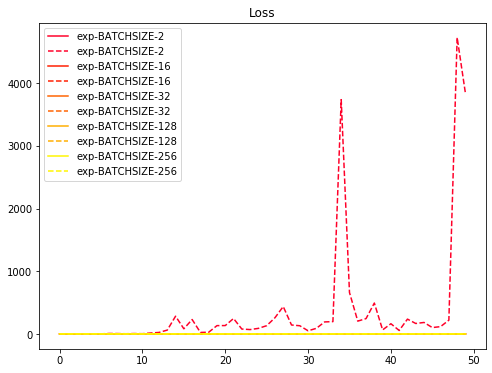

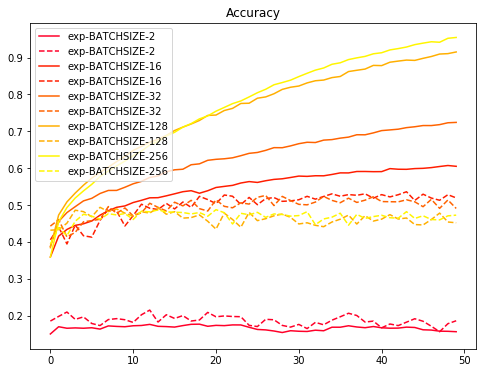

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()